In [1]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
feature_id = 49976

In [26]:
db_name = '/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id, feature_id)

In [27]:
# get all the feature matches with isolation windows
db_conn = sqlite3.connect(db_name)
feature_df = pd.read_sql_query("select * from feature_list where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [28]:
feature_df

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_scan_lower,base_peak_scan_upper,base_peak_centroid_rt,base_peak_std_dev_rt,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper
0,49976,2,1594.765114,430.90812,4644.524956,798.55048,4636.837312,4649.818144,424,438,...,424,438,4644.383682,1.896529,4636.837312,4649.818144,798.390185,0.005877,798.351898,798.418728


In [29]:
feature_charge_state = int(feature_df.charge_state)

In [30]:
# get all the feature matches with isolation windows
db_conn = sqlite3.connect(db_name)
feature_isolation_matches_df = pd.read_sql_query("select distinct(precursor_id) from feature_isolation_matches where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [31]:
feature_isolation_matches_df

,precursor_id
0,162842
1,163039
2,163093
3,163151


In [32]:
precursor_id = 163093

In [33]:
# get all the ms2 peaks for this feature
db_conn = sqlite3.connect(db_name)
ms2_peaks_df = pd.read_sql_query("select * from ms2_peaks where feature_id={} and precursor={} order by peak_id ASC".format(feature_id, precursor_id), db_conn)
db_conn.close()

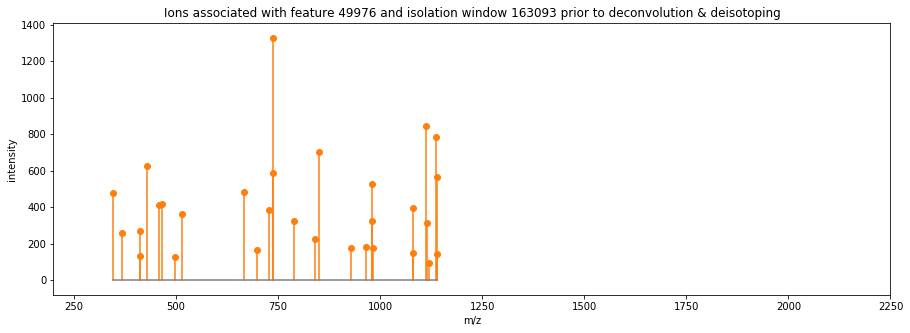

In [34]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(ms2_peaks_df.centroid_mz, ms2_peaks_df.intensity, linefmt="C1-", markerfmt="C1o", basefmt="C7-")
plt.xlabel('m/z')
plt.ylabel('intensity')
# plt.yscale('log')
plt.xlim(200,2250)
# plt.xlim(1000,1010)
plt.margins(0.06)
plt.title('Ions associated with feature {} and isolation window {} prior to deconvolution & deisotoping'.format(feature_id, precursor_id))
plt.show()

In [35]:
# get all the deconvoluted ions for this feature
db_conn = sqlite3.connect(db_name)
deconvoluted_ions_df = pd.read_sql_query("select * from deconvoluted_ions where feature_id={} and precursor_id={}".format(feature_id, precursor_id), db_conn)
db_conn.close()

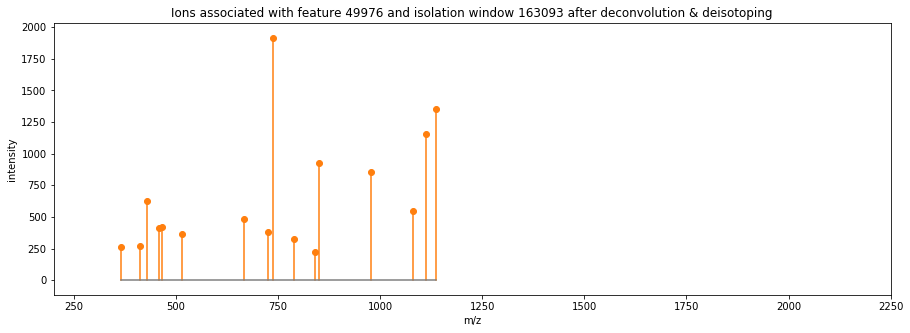

In [36]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(deconvoluted_ions_df.neutral_mass, deconvoluted_ions_df.intensity, linefmt="C1-", markerfmt="C1o", basefmt="C7-")
plt.xlabel('m/z')
plt.ylabel('intensity')
# plt.yscale('log')
plt.xlim(200,2250)
# plt.xlim(1000,1010)
plt.margins(0.06)
plt.title('Ions associated with feature {} and isolation window {} after deconvolution & deisotoping'.format(feature_id, precursor_id))
plt.show()